# The SHTOOLS Class Interface

SHTOOLS defines three major classes that simplify access to the underlying Fortran library:

* **SHCoeffs:** spherical harmonics coefficients and associated functions
* **SHGrid:** spatial grid data on the sphere
* **SHWindows:** holds multitaper window data

Data is stored in internal subclasses in different formats (e.g. Real or Complex coefficients or DH or GLQ grids)

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from pyshtools.shclasses import SHCoeffs, SHGrid, SHWindow

## plot a single spherical harmonic function

The spherical harmonics class SHCoeffs can be initialized directly from a numpy array that holds the coefficient data. To initialize a spectrum that is zero except for the l=5, m=2 harmonic, we can for example write:

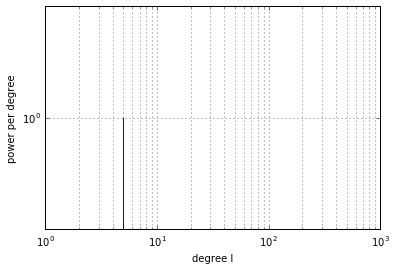

(<matplotlib.figure.Figure at 0x7fda17dee390>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fda17a76ad0>)

In [18]:
nl = 200
coeffs = np.zeros((2, nl, nl))
coeffs[0, 5, 2] = 1.
coeffs_l5m2 = SHCoeffs.from_array(coeffs)

coeffs_l5m2.plot_powerperdegree()

The coefficient class provides functions and methods that stay completely in coefficient space. To plot the function that corresponds to the coefficients, we need to expand it on a spatial grid (called DH2 in this case). The expand function returns a SHGrid class. The type and resolution of the grid is determined automatically to correspond to the maximum degree of the spherical harmonics coefficients to ensure good sampling.

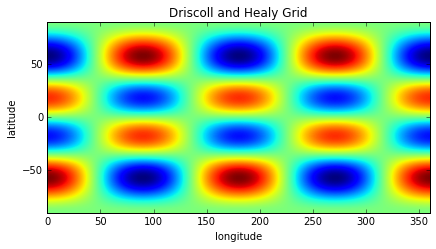

In [19]:
grid_l5m2 = coeffs_l5m2.expand('DH2')

grid_l5m2.plot_rawdata()

## initialize with a random model

Another constructor for the SHCoeffs class is the .from_random method. It takes a power spectrum (power per degree l of the coefficients) and generates independent normal distributed random variables with exactly this power per degree l. This corresponds to a stationary and isotropic random model on the spherical surface whose autocorrelation function is given by the spherical harmonics addition theorem.

We initialize coefficients here with a scale-free power spectrum that has equal band power. The particular property of this model is that it is invariant under zoom operation.

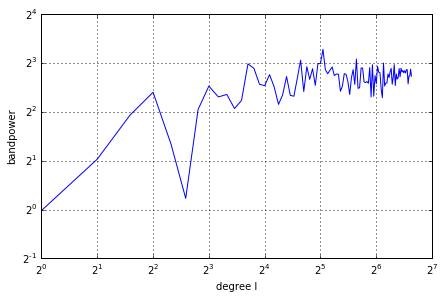

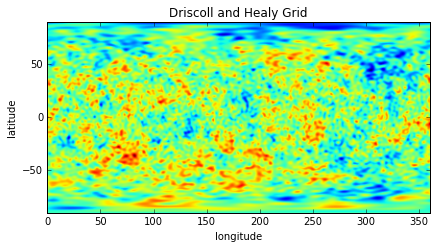

In [20]:
nl = 100  # l=[0, 199]
lmax = nl - 1
a = 10  # scale length
ls = np.arange(nl, dtype=np.float)
power = 1. / (1. + (ls / a) ** 2) ** 0.5

coeffs_global = SHCoeffs.from_random(power)
coeffs_global.plot_powerperband()

grid_global = coeffs_global.expand('DH2')
grid_global.plot_rawdata()

## rotating spherical harmonics

Spherical harmonics coefficients can be rotated very efficiently. We demonstrate this rotating a zonal spherical harmonic (m=0) that is centered around the north-pole to the equator.

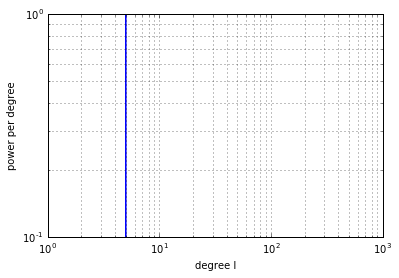

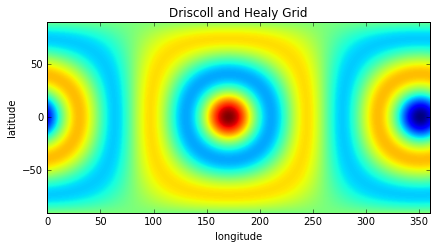

In [21]:
nl = 200
coeffs = np.zeros((2, nl, nl))
coeffs[0, 5, 0] = 1.
coeffs_l5m0 = SHCoeffs.from_array(coeffs)

alpha = 0.  # around z-axis
beta = 90.  # around x-axis (lon=0)
gamma = 10.  # around z-axis again

coeffs_l5m0_rot = coeffs_l5m0.rotate(alpha, beta, gamma, degrees=True)
fig, ax = coeffs_l5m0_rot.plot_powerperdegree(show=False)
ax.set(ylim=(1e-1, 1e0))

grid_l5m0_rot = coeffs_l5m0_rot.expand('DH2')
grid_l5m0_rot.plot_rawdata()

## addition / multiplication / subtraction

Similar grids can be added, multiplied and subtracted using the standard python operators

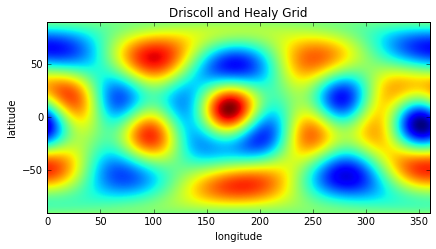

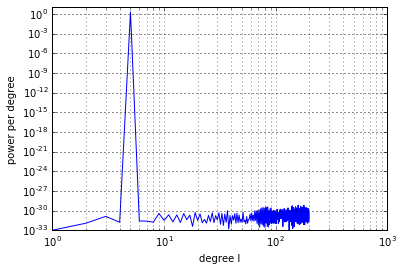

In [24]:
grid_new = grid_l5m0_rot + grid_l5m2

grid_new.plot_rawdata()
coeffs = grid_new.expand()
coeffs.plot_powerperdegree();